<a href="https://colab.research.google.com/github/anas1IA/2024_new_package/blob/main/PSO_Optimization_multi_agents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Particle Swarm Optimization (PSO)

## Overview:
Particle Swarm Optimization (PSO) is a population-based metaheuristic optimization algorithm inspired by the social behavior of bird flocking or fish schooling. It is used to find the optimal solution to optimization problems by iteratively improving a population of candidate solutions called particles.

## Parameters:

1. **Population Size (N)**: Number of particles in the swarm.
2. **Inertia Weight (w)**: Controls the impact of the particle's previous velocity on its current velocity.
3. **Cognitive Coefficient (c1)**: Influences the particle's movement towards its own best-known position.
4. **Social Coefficient (c2)**: Influences the particle's movement towards the global best-known position.
5. **Maximum Velocity (Vmax)**: Limits the maximum step a particle can take in any dimension.

## Formulas:

### Particle Update:
- **Velocity Update**: $ v_{i}^{t+1} = w \cdot v_{i}^{t} + c1 \cdot r1 \cdot (pbest_{i} - x_{i}^{t}) + c2 \cdot r2 \cdot (gbest - x_{i}^{t}) $
- **Position Update**: $ x_{i}^{t+1} = x_{i}^{t} + v_{i}^{t+1} $

Where:
- $ v_{i}^{t} $ is the velocity of particle $ i $ at iteration $ t $.
- $ x_{i}^{t} $ is the position of particle $ i $ at iteration $ t $.
- $ pbest_{i} $ is the best position found by particle $ i $ so far.
- $ gbest $ is the best position found by any particle in the swarm.
- $ r1 $ and $ r2 $ are random numbers between 0 and 1.

## Benefits:
- **Simple Implementation**: PSO has a straightforward implementation compared to other optimization algorithms.
- **No Gradients Required**: PSO doesn't require the gradient of the problem being optimized, making it suitable for problems where gradients are not readily available or too expensive to compute.
- **Global and Local Search**: PSO balances exploration and exploitation through the cognitive and social components, allowing it to search both globally and locally for the optimal solution.
- **Versatility**: PSO is versatile and can be applied to various optimization problems in different domains.

PSO's effectiveness depends on properly tuning its parameters and balancing exploration and exploitation to efficiently converge to the optimal solution.


##Exercice 1

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def ackley_func(x, y):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - \
           np.exp(0.5 * (np.cos(2*np.pi * x) + np.cos(2*np.pi * y))) + np.e + 20

def plot_ackley():
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)


    Z = ackley_func(X, Y)


    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')


    ax.set_title('Ackley Function')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Function Value')


    plt.show()


plot_ackley()


In [48]:
import numpy as np
import random
from typing import Callable

class PSO:
    class Particle:
        def __init__(self, fitness: Callable, dim: int, minx: float, maxx: float, seed: int):
            self.rnd = random.Random(seed)
            self.position = np.random.uniform(minx , maxx, dim)
            self.velocity = np.random.uniform(minx, maxx, dim)
            self.best_position = self.position.copy()
            self.fitness = fitness(self.position)

        def __str__(self):
            return f"Position: {self.position}, Velocity: {self.velocity}, Best Position: {self.best_position}, Fitness: {self.fitness}"


    def PSO(ackley_func, dim, n_particles, n_iterations):
        w = 0.5
        c1 = 1
        c2 = 2

        particles = [PSO.Particle(ackley_func, dim, -10, 10, i) for i in range(n_particles)]

        global_best_position = np.zeros(dim)
        global_best_fitness = float('inf')

        particle_positions = np.zeros((n_iterations, n_particles, dim))
        function_values = np.zeros((n_iterations, n_particles))

        for iter_idx in range(n_iterations):
            for particle_idx, particle in enumerate(particles):
                particle.fitness = ackley_func(particle.position)

                if particle.fitness < ackley_func(particle.best_position):
                    particle.best_position = particle.position.copy()

                if particle.fitness < global_best_fitness:
                    global_best_position = particle.position.copy()
                    global_best_fitness = particle.fitness

            for particle_idx, particle in enumerate(particles):
                new_velocity = (w * particle.velocity +
                                c1 * np.random.rand(dim) * (particle.best_position - particle.position) +
                                c2 * np.random.rand(dim) * (global_best_position - particle.position))
                particle.velocity = new_velocity

                particle.position += particle.velocity

                particle_positions[iter_idx, particle_idx, :] = particle.position
                function_values[iter_idx, particle_idx] = particle.fitness

        return global_best_position, global_best_fitness, particle_positions, function_values ,particles


def ackley_func(x):
    return -20 * np.exp(-0.2 * np.sqrt( 0.5 * np.sum(x**2))) + \
            - np.exp(0.5 * (np.cos(2*np.pi * x[0]) + np.cos(2*np.pi * x[1]))) + np.e + 20

np.random.seed(42)
dim = 2
n_particles = 25
n_iterations = 40

best_position, best_fitness, particle_positions, function_values, particles = PSO.PSO(ackley_func, dim, n_particles, n_iterations)
print("Best position:", best_position)
print("Best fitness:", best_fitness)
print(particles[8])


Best position: [2.03459559e-05 1.25784063e-05]
Best fitness: 6.767167560894904e-05
Position: [0.00076139 0.00035872], Velocity: [3.47567142e-05 5.21000857e-04], Best Position: [0.00011674 0.00019364], Fitness: 0.002120616885090243


In [49]:
def plot_pso(particle_positions, function_values):
    n_iterations, n_particles, dim = particle_positions.shape
    iterations = np.arange(n_iterations)


    plt.figure(figsize=(12, 6))
    for particle_idx in range(n_particles):
        plt.plot(iterations, particle_positions[:, particle_idx, 0], label=f'Particle {particle_idx+1}')
    plt.title('Particle Positions')
    plt.xlabel('Iteration')
    plt.ylabel('Position')
    plt.legend()
    plt.grid(True)
    plt.show()


    plt.figure(figsize=(12, 6))
    for particle_idx in range(n_particles):
        plt.plot(iterations, function_values[:, particle_idx], label=f'Particle {particle_idx+1}')
    plt.title('Function Values')
    plt.xlabel('Iteration')
    plt.ylabel('Function Value')
    plt.legend()
    plt.grid(True)
    plt.show()

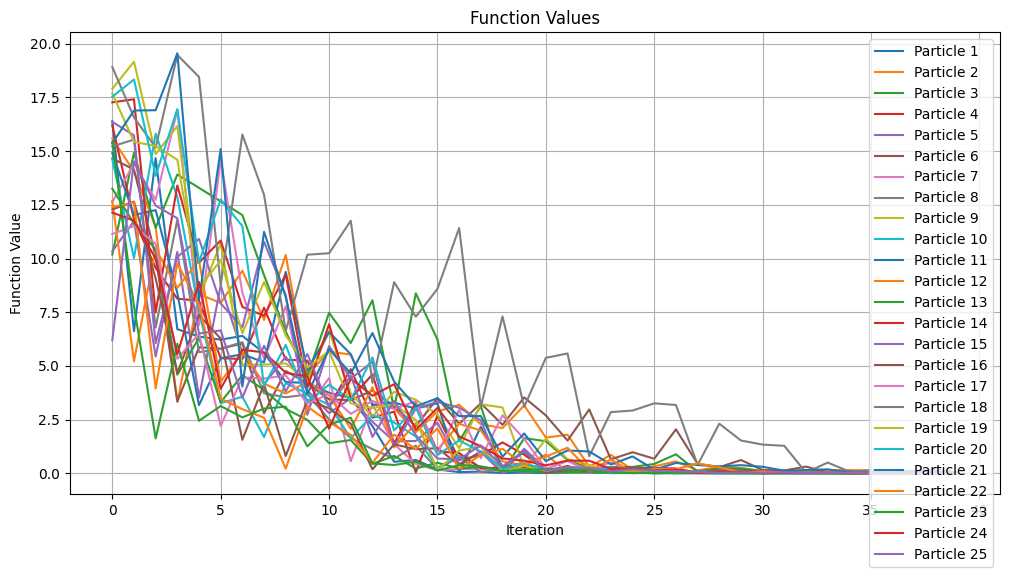

In [50]:
plot_pso(particle_positions, function_values)

##Exercice 2

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

class Particle:
    def __init__(self, num_nodes):
        self.position = np.random.permutation(num_nodes)
        self.velocity = np.zeros(num_nodes)
        self.best_position = np.copy(self.position)
        self.best_cost = float('inf')

def calculate_cost(graph, path):
    cost = 0
    for i in range(len(path) - 1):
        cost += graph[path[i]][path[i+1]]
    return cost

def pso(graph, num_particles, max_iterations, c1, c2):
    num_nodes = len(graph)
    particles = [Particle(num_nodes) for _ in range(num_particles)]
    global_best_position = None
    global_best_cost = float('inf')

    for _ in range(max_iterations):
        for particle in particles:
            current_cost = calculate_cost(graph, particle.position)
            if current_cost < particle.best_cost:
                particle.best_position = np.copy(particle.position)
                particle.best_cost = current_cost

            if current_cost < global_best_cost:
                global_best_position = np.copy(particle.position)
                global_best_cost = current_cost

        for particle in particles:
            r1, r2 = np.random.rand(), np.random.rand()
            particle.velocity = (particle.velocity +
                                 c1 * r1 * (particle.best_position - particle.position) +
                                 c2 * r2 * (global_best_position - particle.position))
            particle.position = np.argsort(particle.position + particle.velocity)

    return global_best_position, global_best_cost

def run_simulation(graph, num_particles, max_iterations, c1, c2):
    best_path, best_cost = pso(graph, num_particles, max_iterations, c1, c2)
    return best_path, best_cost

def plot_graph_with_path(graph, path):
    G = nx.Graph()
    for i in range(len(graph)):
        for j in range(len(graph[i])):
            if graph[i][j] != 0:
                G.add_edge(i, j, weight=graph[i][j])

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
    edges = [(path[i], path[i+1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, edge_color='red')
    plt.show()




Particles: 5, Iterations: 50, C1: 1.0, C2: 1.0, Best Path: [2 1 4 0 3], Cost: 1


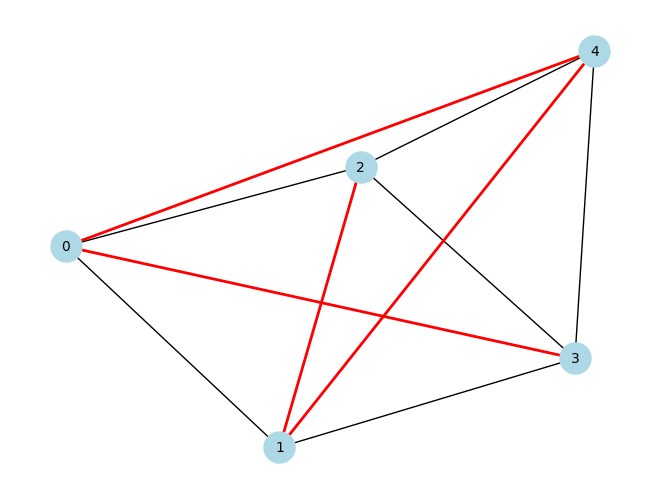

Particles: 5, Iterations: 50, C1: 1.0, C2: 1.5, Best Path: [3 0 4 1 2], Cost: 1


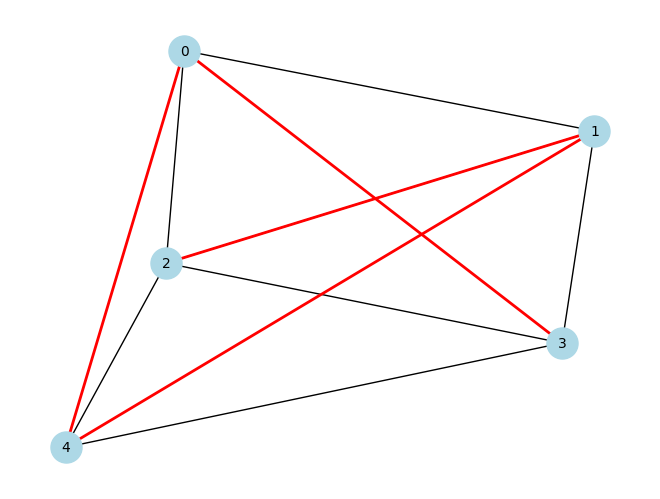

Particles: 5, Iterations: 50, C1: 1.0, C2: 2.0, Best Path: [3 0 4 1 2], Cost: 1


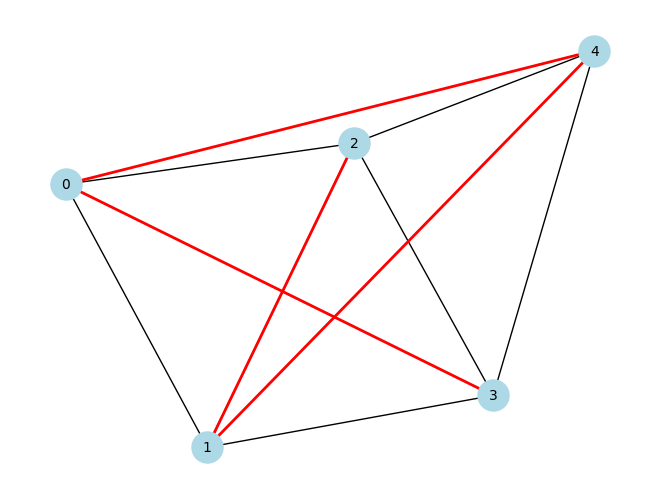

Particles: 5, Iterations: 50, C1: 1.5, C2: 1.0, Best Path: [1 4 0 3 2], Cost: 2


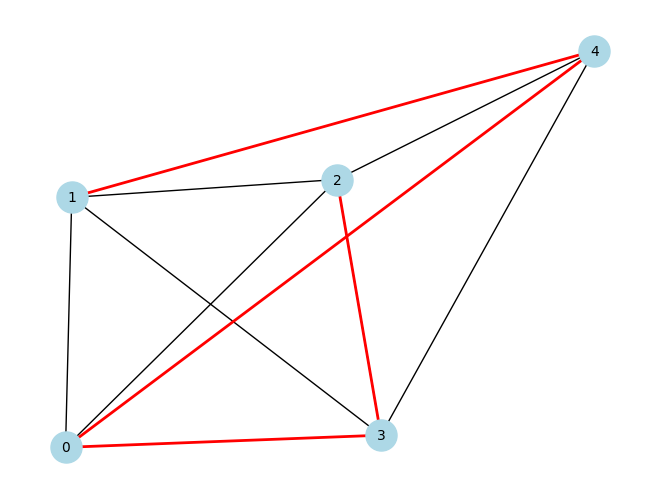

Particles: 5, Iterations: 50, C1: 1.5, C2: 1.5, Best Path: [3 0 4 1 2], Cost: 1


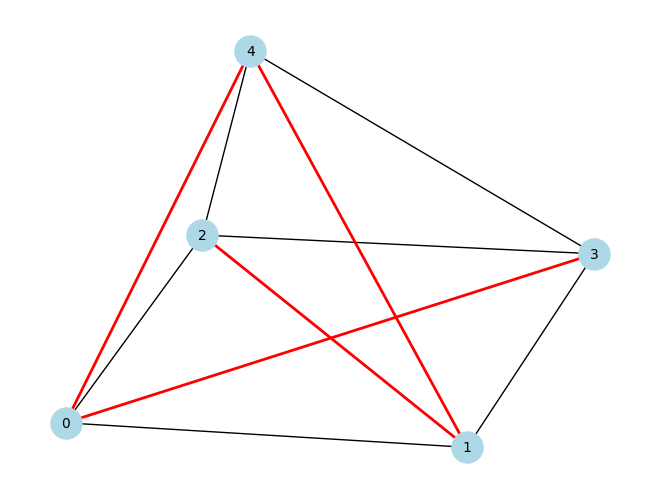

Particles: 5, Iterations: 50, C1: 1.5, C2: 2.0, Best Path: [1 4 0 3 2], Cost: 2


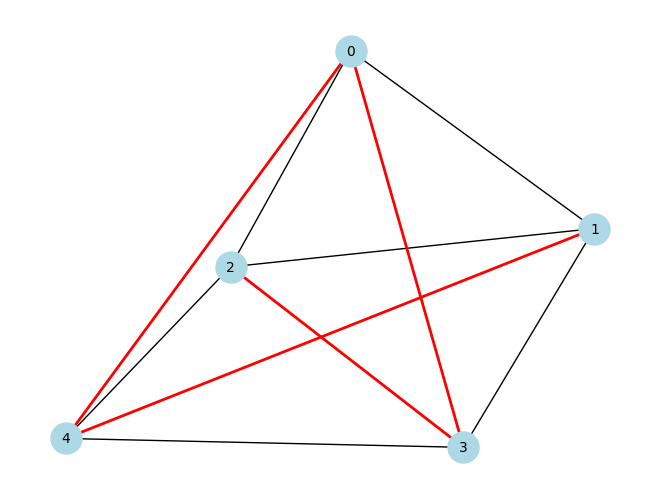

Particles: 5, Iterations: 50, C1: 2.0, C2: 1.0, Best Path: [2 1 4 0 3], Cost: 1


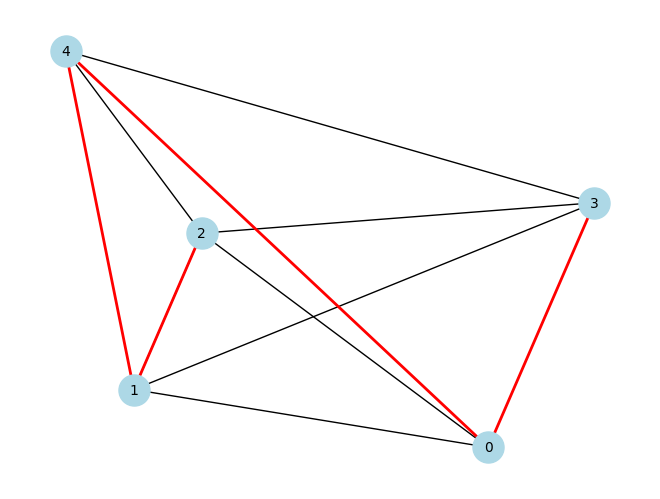

Particles: 5, Iterations: 50, C1: 2.0, C2: 1.5, Best Path: [3 0 4 1 2], Cost: 1


Particles: 5, Iterations: 50, C1: 2.0, C2: 2.0, Best Path: [4 1 2 3 0], Cost: 3


Particles: 5, Iterations: 100, C1: 1.0, C2: 1.0, Best Path: [2 3 0 4 1], Cost: 2


Particles: 5, Iterations: 100, C1: 1.0, C2: 1.5, Best Path: [2 1 4 0 3], Cost: 1


Particles: 5, Iterations: 100, C1: 1.0, C2: 2.0, Best Path: [2 1 4 0 3], Cost: 1


Particles: 5, Iterations: 100, C1: 1.5, C2: 1.0, Best Path: [2 1 4 0 3], Cost: 1


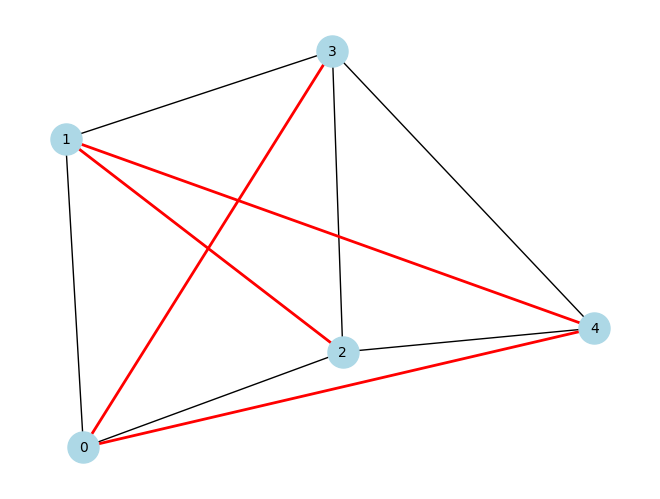

Particles: 5, Iterations: 100, C1: 1.5, C2: 1.5, Best Path: [2 3 0 4 1], Cost: 2


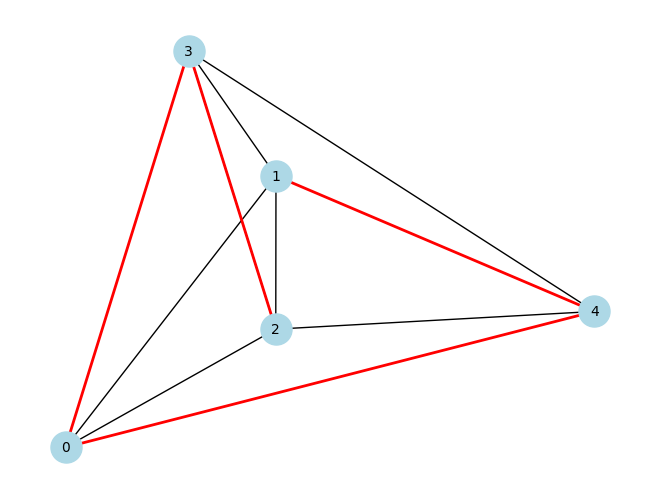

Particles: 5, Iterations: 100, C1: 1.5, C2: 2.0, Best Path: [3 0 4 1 2], Cost: 1


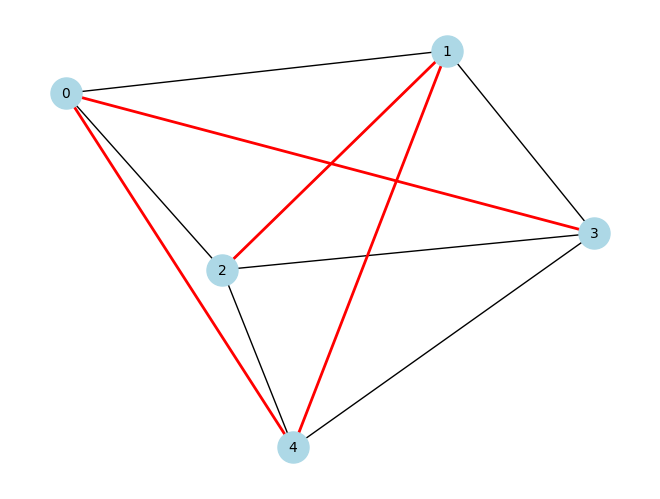

Particles: 5, Iterations: 100, C1: 2.0, C2: 1.0, Best Path: [2 3 0 4 1], Cost: 2


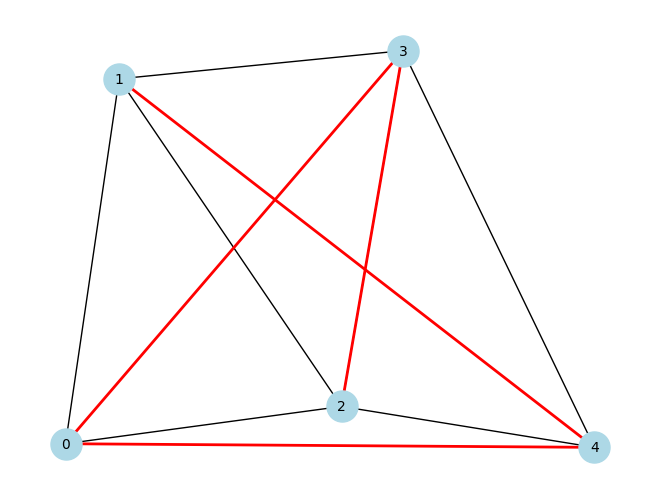

Particles: 5, Iterations: 100, C1: 2.0, C2: 1.5, Best Path: [3 0 4 1 2], Cost: 1


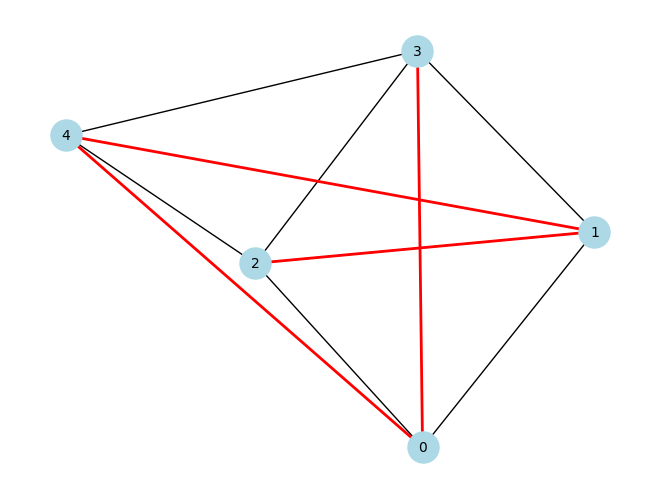

Particles: 5, Iterations: 100, C1: 2.0, C2: 2.0, Best Path: [2 3 0 4 1], Cost: 2


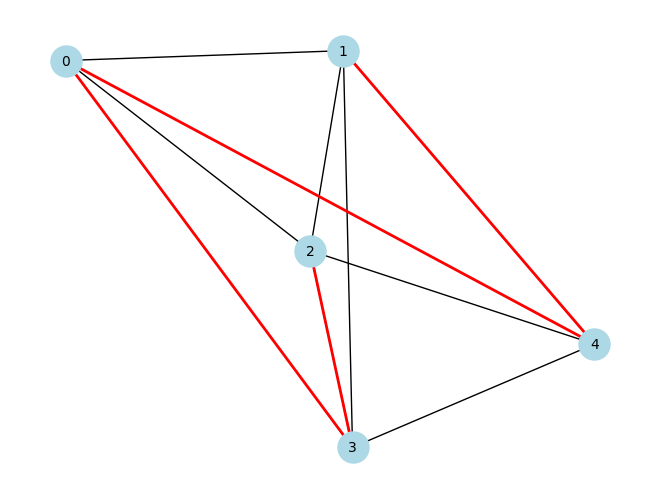

Particles: 5, Iterations: 150, C1: 1.0, C2: 1.0, Best Path: [2 1 4 3 0], Cost: 2


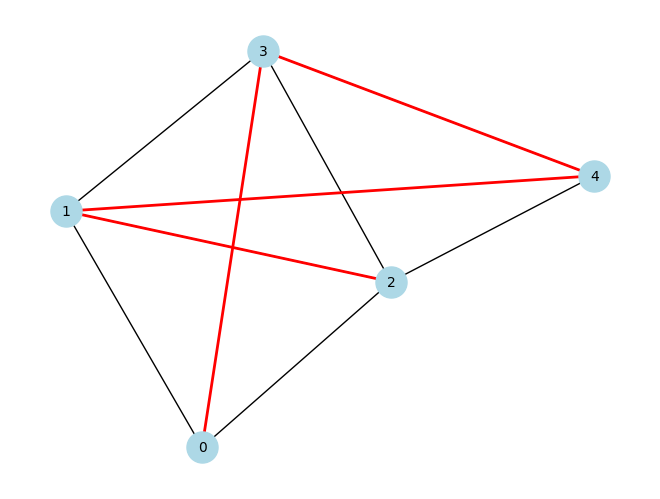

Particles: 5, Iterations: 150, C1: 1.0, C2: 1.5, Best Path: [2 1 4 0 3], Cost: 1


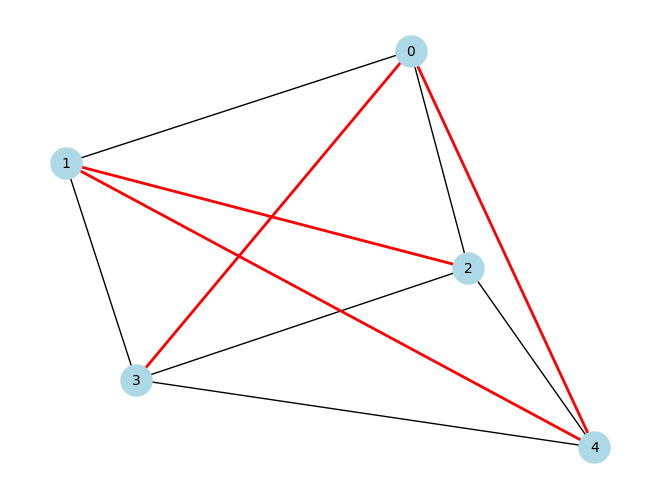

Particles: 5, Iterations: 150, C1: 1.0, C2: 2.0, Best Path: [3 2 1 4 0], Cost: 3


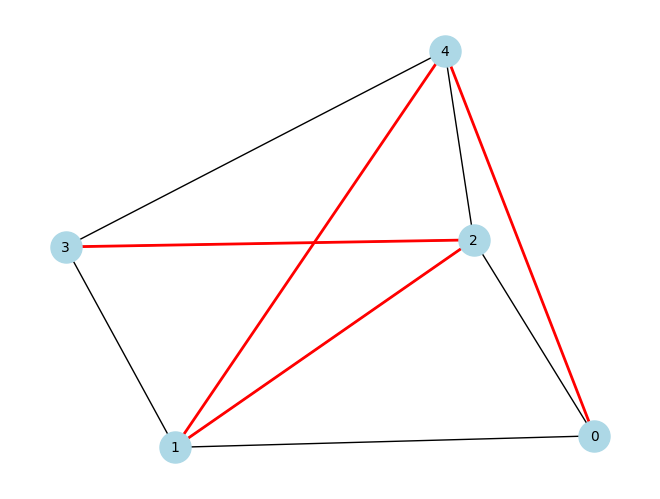

Particles: 5, Iterations: 150, C1: 1.5, C2: 1.0, Best Path: [3 2 1 4 0], Cost: 3


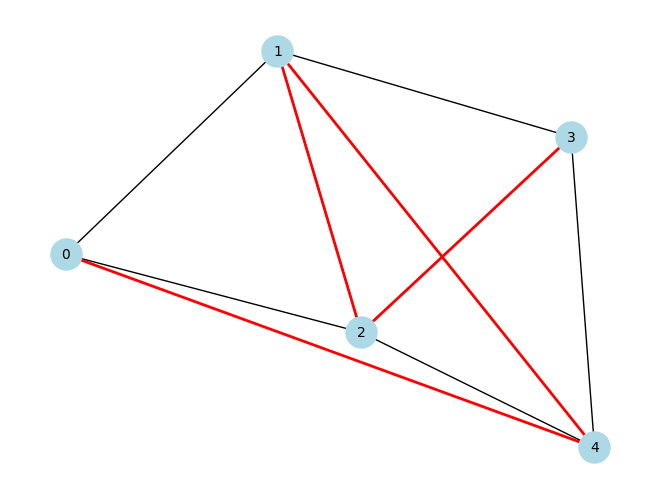

Particles: 5, Iterations: 150, C1: 1.5, C2: 1.5, Best Path: [3 2 1 4 0], Cost: 3


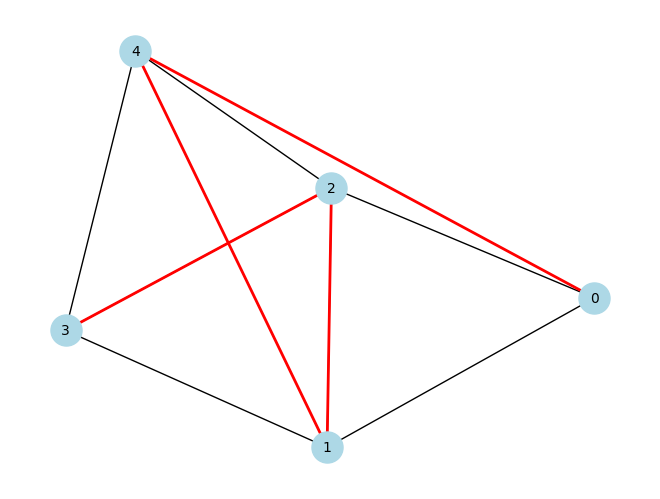

Particles: 5, Iterations: 150, C1: 1.5, C2: 2.0, Best Path: [0 4 3 2 1], Cost: 4


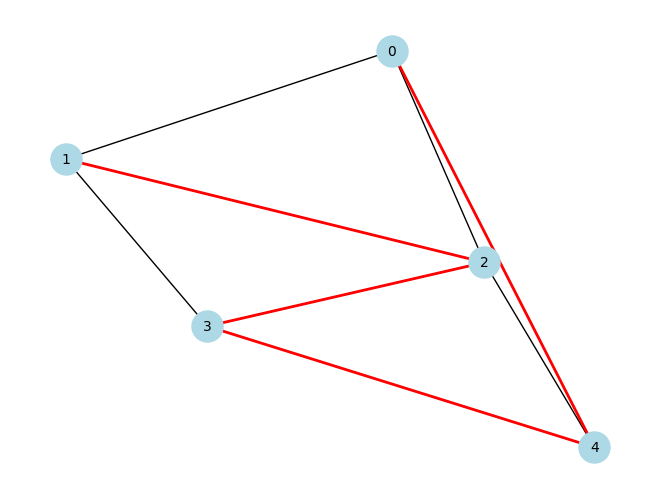

Particles: 5, Iterations: 150, C1: 2.0, C2: 1.0, Best Path: [2 1 4 3 0], Cost: 2


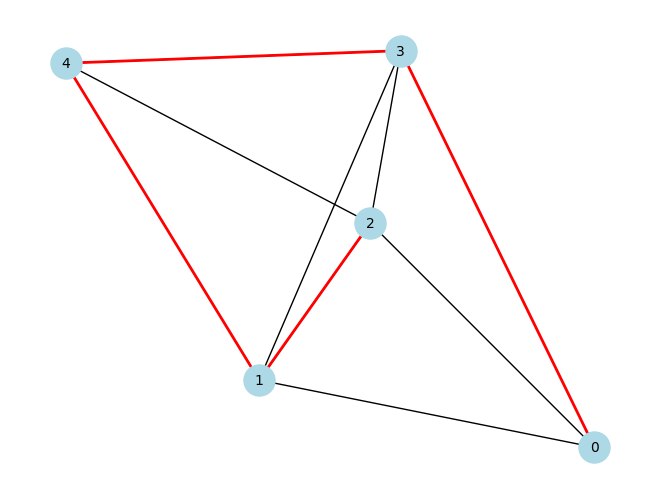

Particles: 5, Iterations: 150, C1: 2.0, C2: 1.5, Best Path: [3 0 4 1 2], Cost: 1


Particles: 5, Iterations: 150, C1: 2.0, C2: 2.0, Best Path: [2 1 4 0 3], Cost: 1


Particles: 10, Iterations: 50, C1: 1.0, C2: 1.0, Best Path: [2 1 4 0 3], Cost: 1


Particles: 10, Iterations: 50, C1: 1.0, C2: 1.5, Best Path: [2 1 4 3 0], Cost: 2


Particles: 10, Iterations: 50, C1: 1.0, C2: 2.0, Best Path: [3 0 4 1 2], Cost: 1


Particles: 10, Iterations: 50, C1: 1.5, C2: 1.0, Best Path: [2 1 4 0 3], Cost: 1


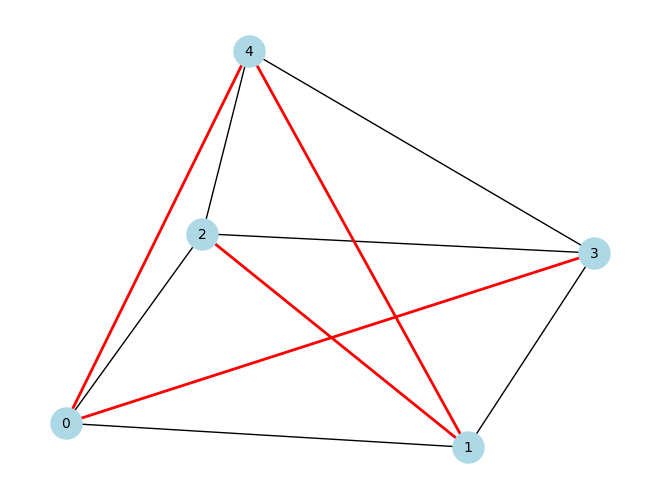

Particles: 10, Iterations: 50, C1: 1.5, C2: 1.5, Best Path: [2 3 0 4 1], Cost: 2


Particles: 10, Iterations: 50, C1: 1.5, C2: 2.0, Best Path: [2 1 4 0 3], Cost: 1


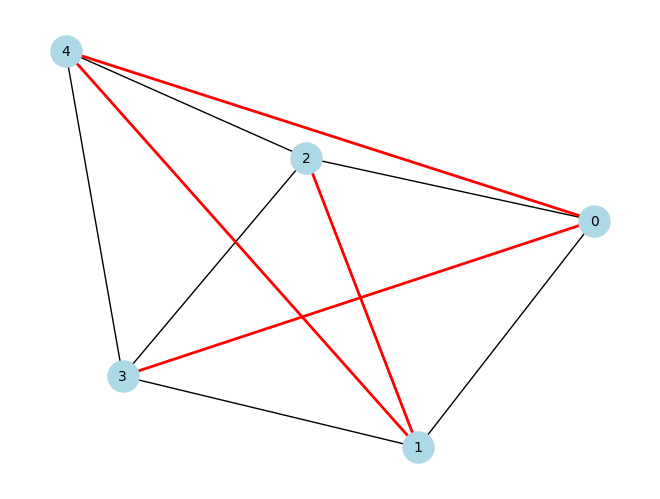

Particles: 10, Iterations: 50, C1: 2.0, C2: 1.0, Best Path: [2 1 4 0 3], Cost: 1


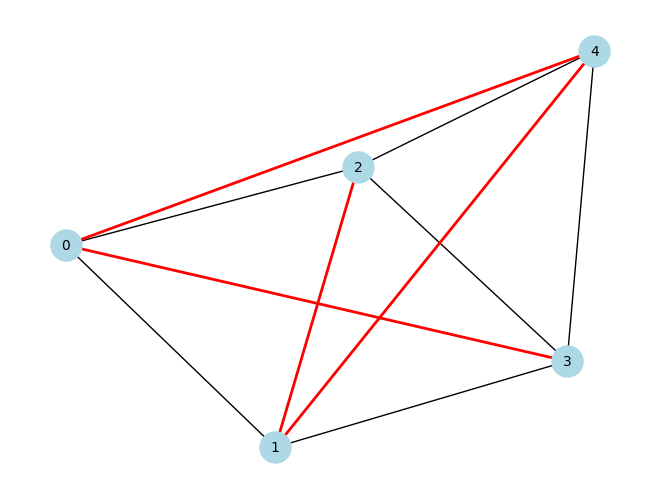

Particles: 10, Iterations: 50, C1: 2.0, C2: 1.5, Best Path: [2 1 4 0 3], Cost: 1


Particles: 10, Iterations: 50, C1: 2.0, C2: 2.0, Best Path: [2 1 4 3 0], Cost: 2


Particles: 10, Iterations: 100, C1: 1.0, C2: 1.0, Best Path: [2 1 4 0 3], Cost: 1


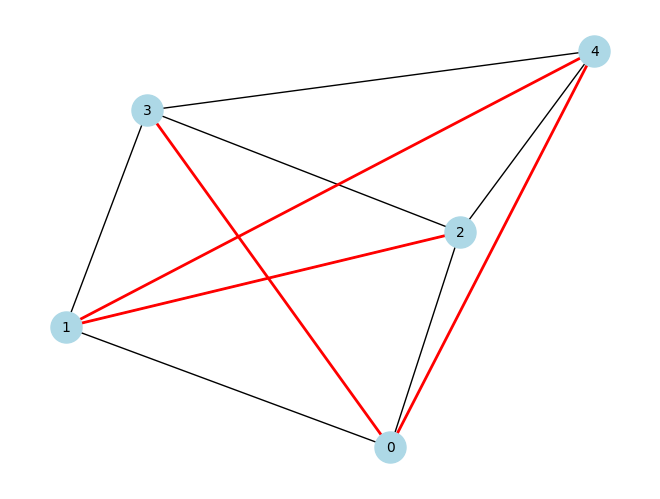

Particles: 10, Iterations: 100, C1: 1.0, C2: 1.5, Best Path: [2 1 4 0 3], Cost: 1


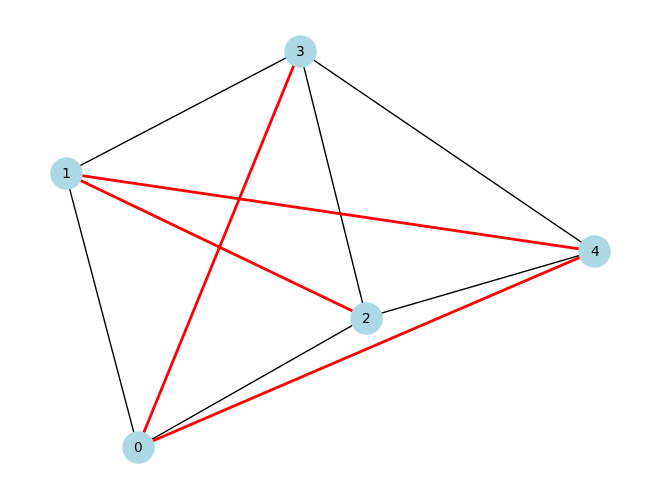

Particles: 10, Iterations: 100, C1: 1.0, C2: 2.0, Best Path: [2 1 4 3 0], Cost: 2


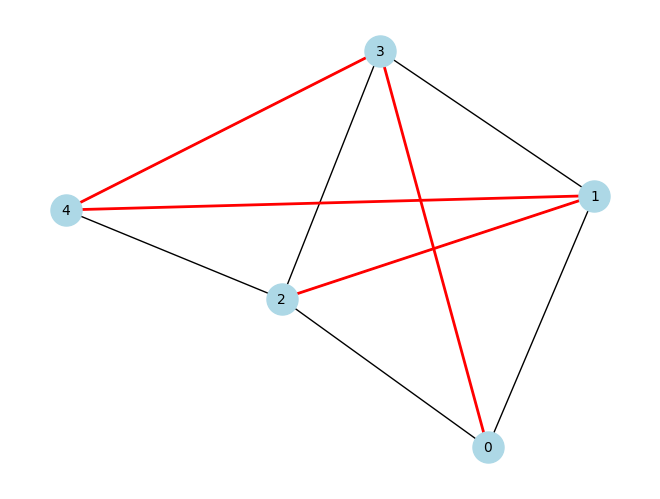

Particles: 10, Iterations: 100, C1: 1.5, C2: 1.0, Best Path: [3 0 4 1 2], Cost: 1


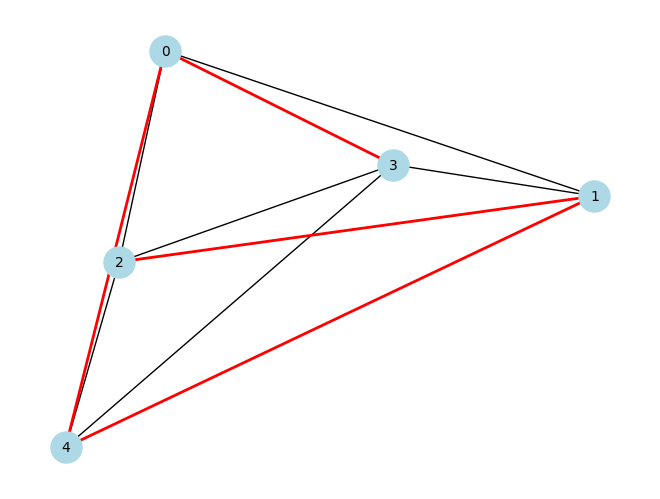

Particles: 10, Iterations: 100, C1: 1.5, C2: 1.5, Best Path: [2 1 4 0 3], Cost: 1


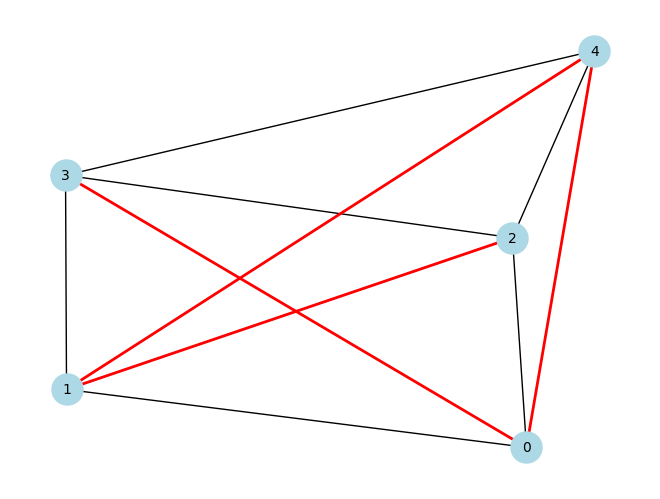

Particles: 10, Iterations: 100, C1: 1.5, C2: 2.0, Best Path: [2 3 0 4 1], Cost: 2


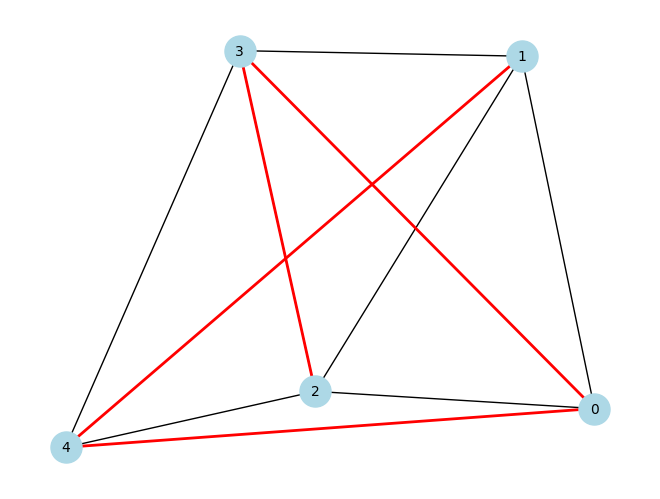

Particles: 10, Iterations: 100, C1: 2.0, C2: 1.0, Best Path: [2 1 4 0 3], Cost: 1


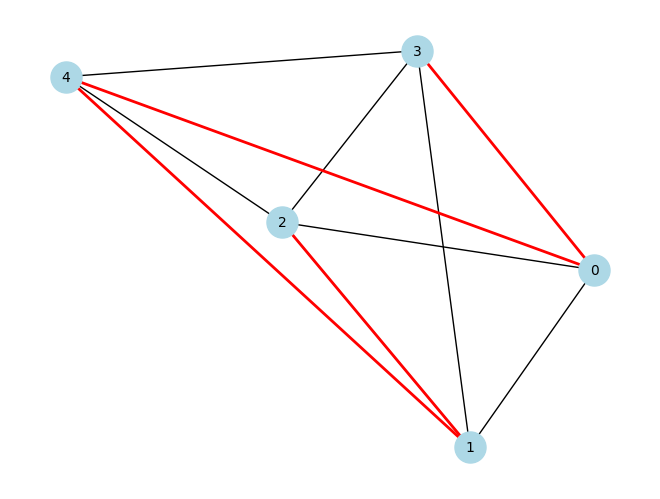

Particles: 10, Iterations: 100, C1: 2.0, C2: 1.5, Best Path: [2 1 4 0 3], Cost: 1


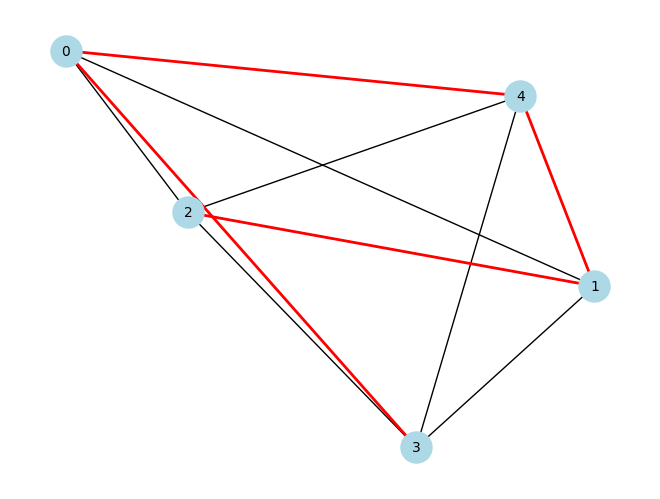

Particles: 10, Iterations: 100, C1: 2.0, C2: 2.0, Best Path: [3 0 4 1 2], Cost: 1


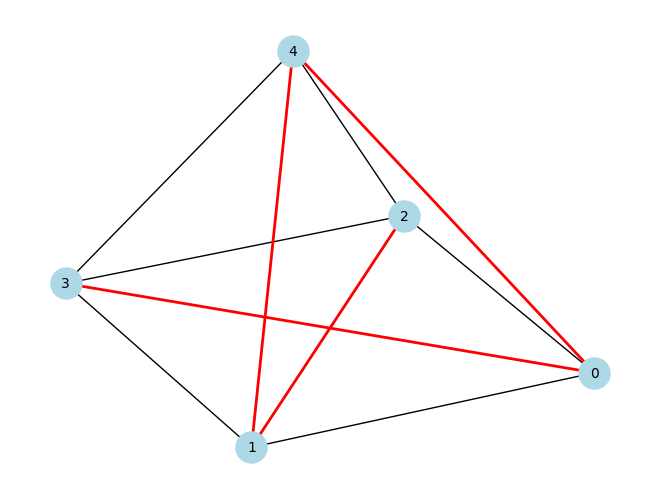

Particles: 10, Iterations: 150, C1: 1.0, C2: 1.0, Best Path: [2 1 4 0 3], Cost: 1


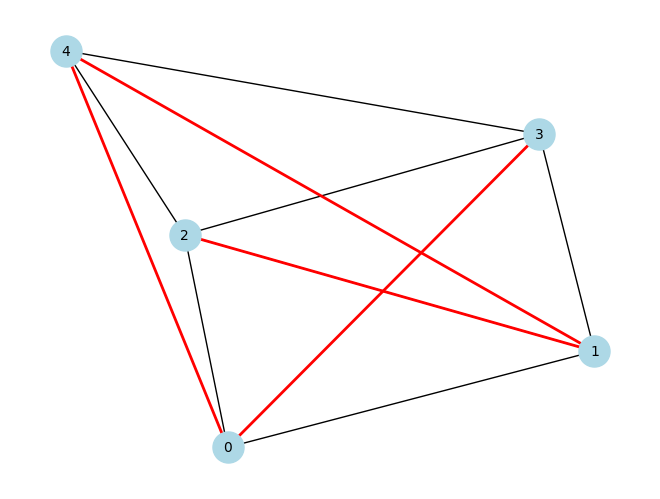

Particles: 10, Iterations: 150, C1: 1.0, C2: 1.5, Best Path: [2 1 4 0 3], Cost: 1


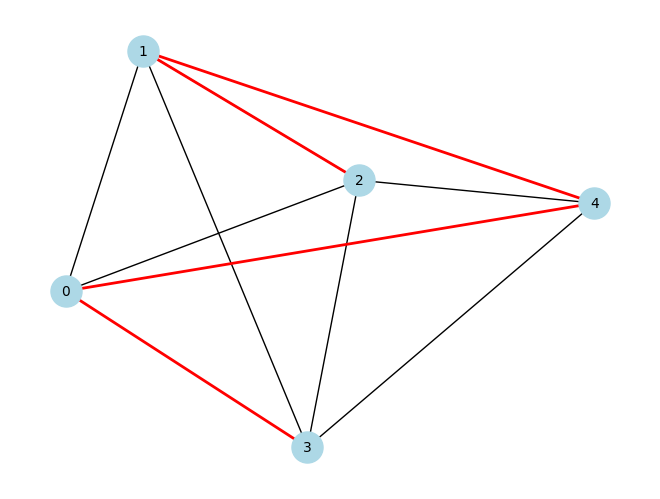

Particles: 10, Iterations: 150, C1: 1.0, C2: 2.0, Best Path: [2 3 0 4 1], Cost: 2


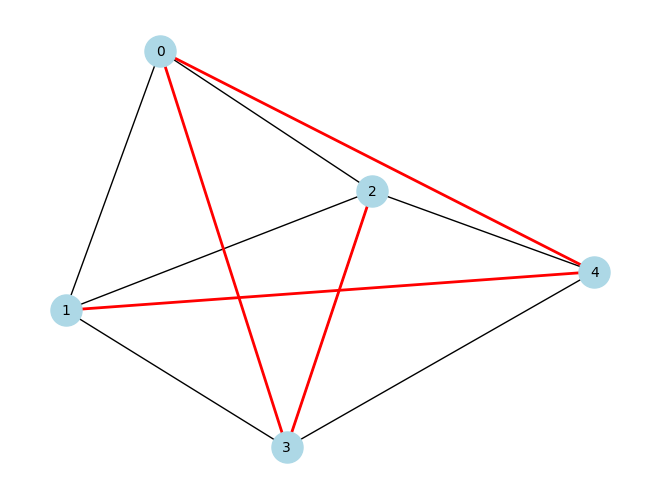

Particles: 10, Iterations: 150, C1: 1.5, C2: 1.0, Best Path: [3 0 4 1 2], Cost: 1


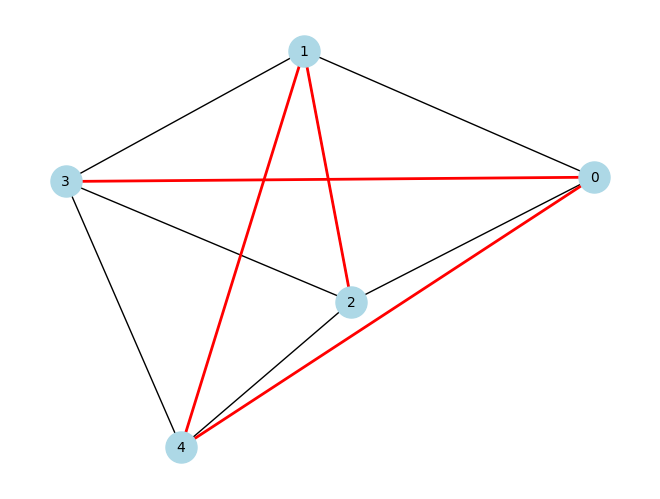

Particles: 10, Iterations: 150, C1: 1.5, C2: 1.5, Best Path: [2 3 0 4 1], Cost: 2


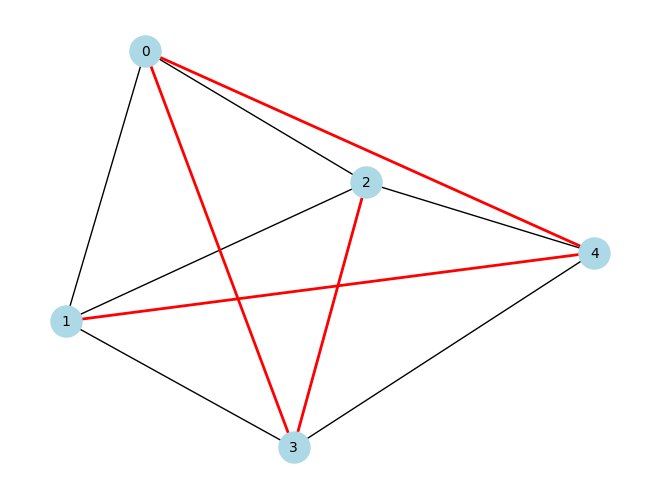

Particles: 10, Iterations: 150, C1: 1.5, C2: 2.0, Best Path: [1 4 0 3 2], Cost: 2


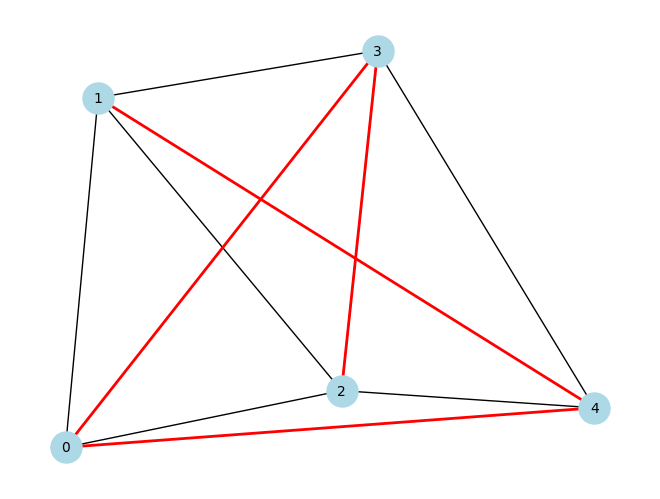

Particles: 10, Iterations: 150, C1: 2.0, C2: 1.0, Best Path: [3 0 4 1 2], Cost: 1


Particles: 10, Iterations: 150, C1: 2.0, C2: 1.5, Best Path: [2 1 4 0 3], Cost: 1


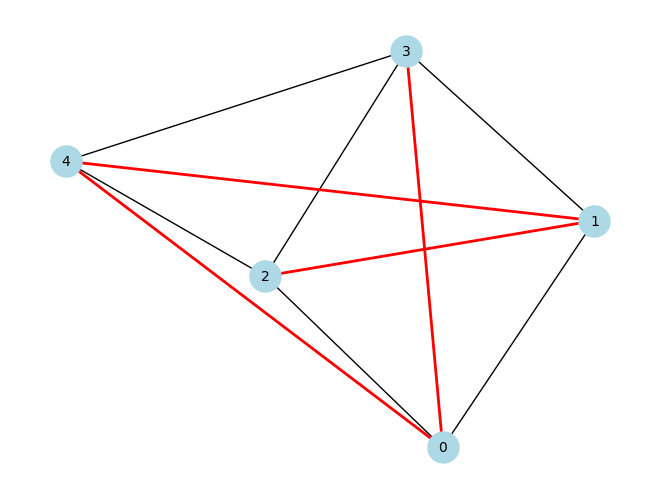

Particles: 10, Iterations: 150, C1: 2.0, C2: 2.0, Best Path: [3 0 4 1 2], Cost: 1


Particles: 20, Iterations: 50, C1: 1.0, C2: 1.0, Best Path: [2 1 4 3 0], Cost: 2


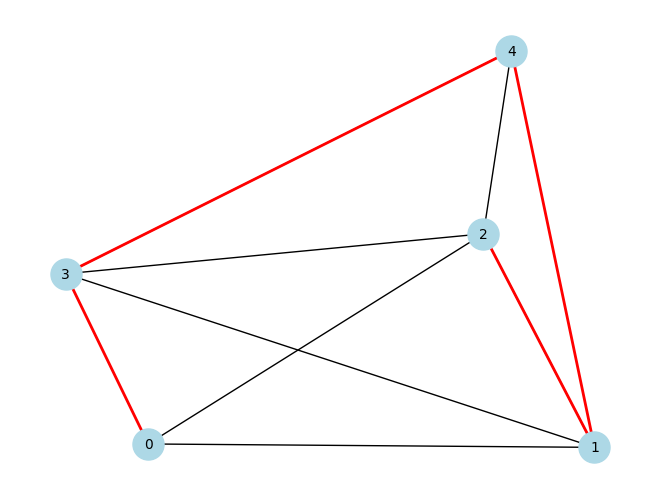

Particles: 20, Iterations: 50, C1: 1.0, C2: 1.5, Best Path: [3 0 4 1 2], Cost: 1


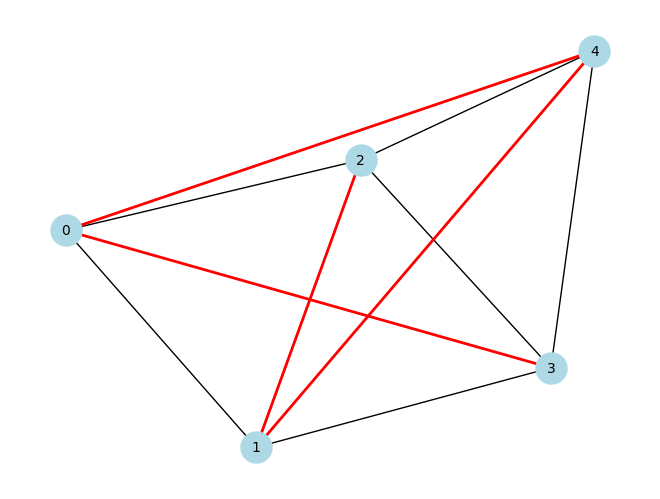

Particles: 20, Iterations: 50, C1: 1.0, C2: 2.0, Best Path: [3 0 4 1 2], Cost: 1


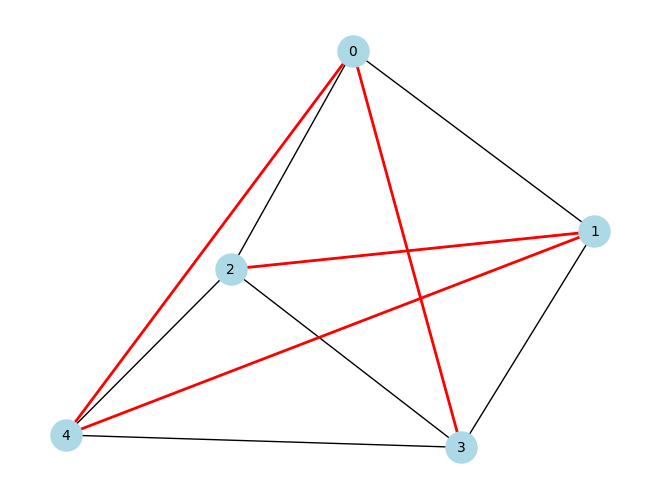

Particles: 20, Iterations: 50, C1: 1.5, C2: 1.0, Best Path: [2 1 4 3 0], Cost: 2


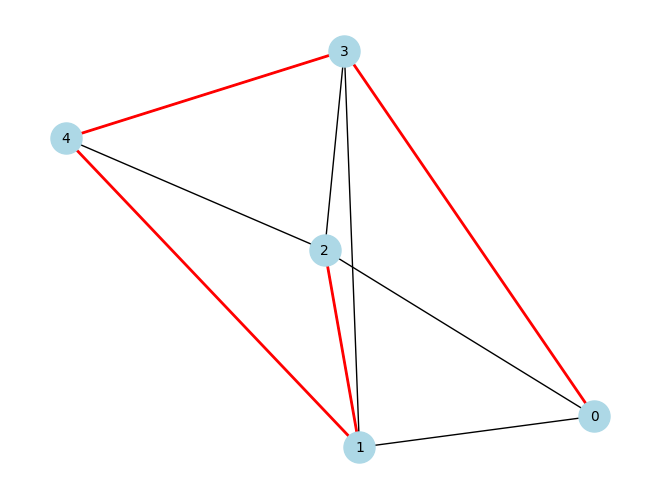

Particles: 20, Iterations: 50, C1: 1.5, C2: 1.5, Best Path: [2 1 4 3 0], Cost: 2


Particles: 20, Iterations: 50, C1: 1.5, C2: 2.0, Best Path: [2 1 4 0 3], Cost: 1


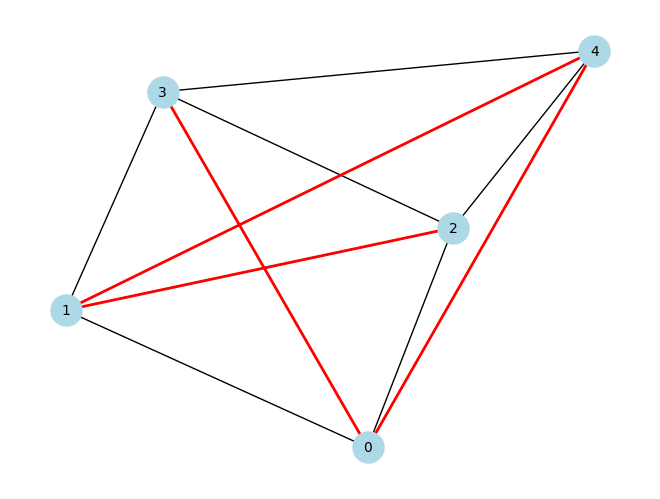

Particles: 20, Iterations: 50, C1: 2.0, C2: 1.0, Best Path: [2 1 4 0 3], Cost: 1


Particles: 20, Iterations: 50, C1: 2.0, C2: 1.5, Best Path: [3 0 4 1 2], Cost: 1


Particles: 20, Iterations: 50, C1: 2.0, C2: 2.0, Best Path: [2 3 0 4 1], Cost: 2


Particles: 20, Iterations: 100, C1: 1.0, C2: 1.0, Best Path: [2 1 4 3 0], Cost: 2


Particles: 20, Iterations: 100, C1: 1.0, C2: 1.5, Best Path: [2 1 4 0 3], Cost: 1


Particles: 20, Iterations: 100, C1: 1.0, C2: 2.0, Best Path: [2 1 4 0 3], Cost: 1


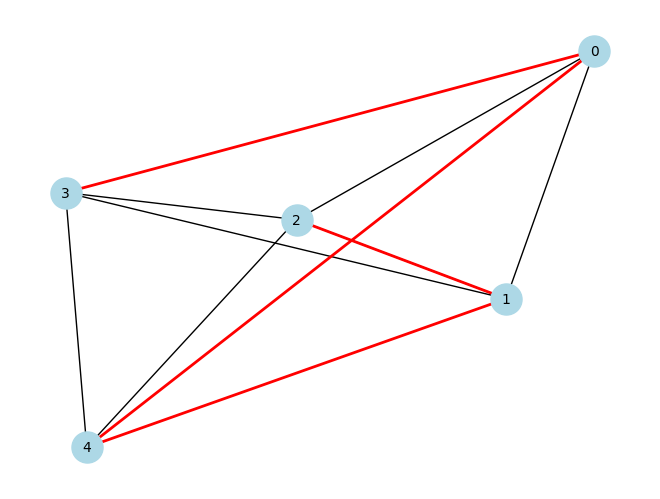

Particles: 20, Iterations: 100, C1: 1.5, C2: 1.0, Best Path: [3 0 4 1 2], Cost: 1


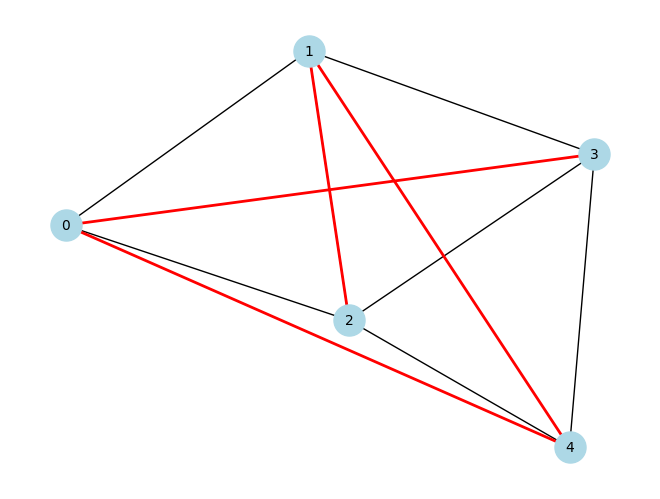

Particles: 20, Iterations: 100, C1: 1.5, C2: 1.5, Best Path: [2 1 4 0 3], Cost: 1


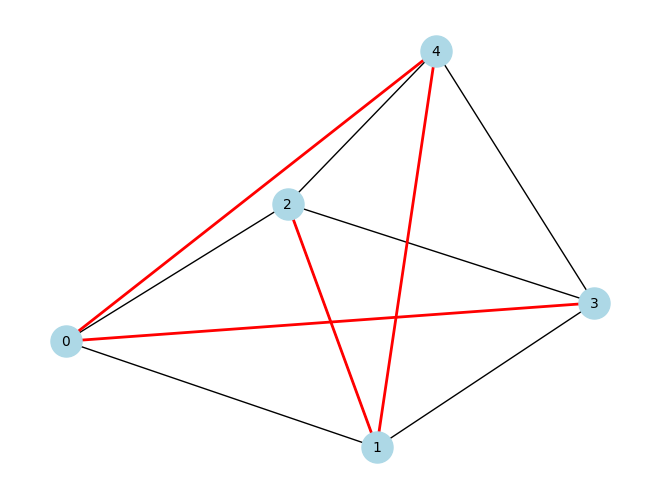

Particles: 20, Iterations: 100, C1: 1.5, C2: 2.0, Best Path: [2 1 4 3 0], Cost: 2


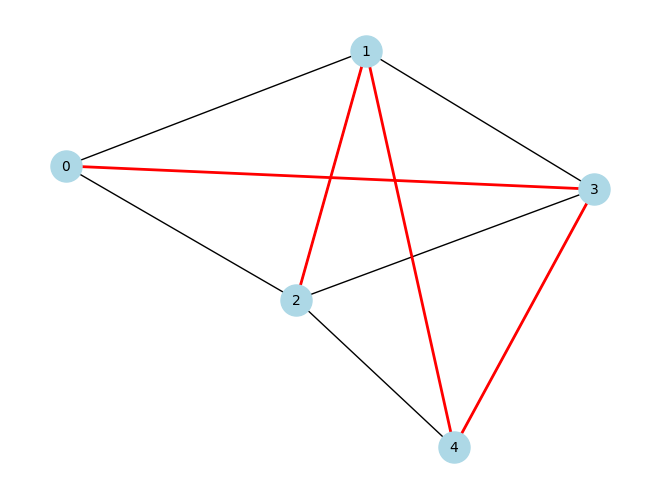

Particles: 20, Iterations: 100, C1: 2.0, C2: 1.0, Best Path: [2 1 4 0 3], Cost: 1


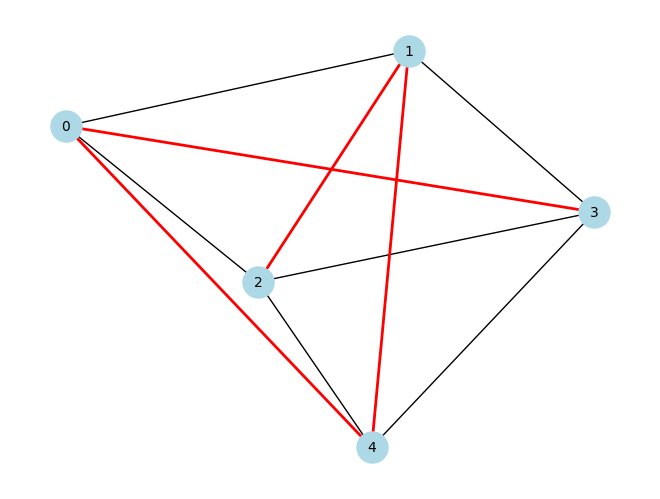

Particles: 20, Iterations: 100, C1: 2.0, C2: 1.5, Best Path: [3 0 4 1 2], Cost: 1


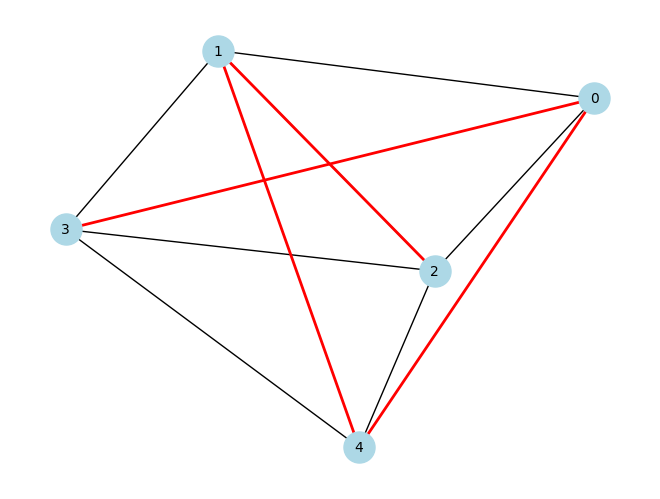

Particles: 20, Iterations: 100, C1: 2.0, C2: 2.0, Best Path: [3 0 4 1 2], Cost: 1


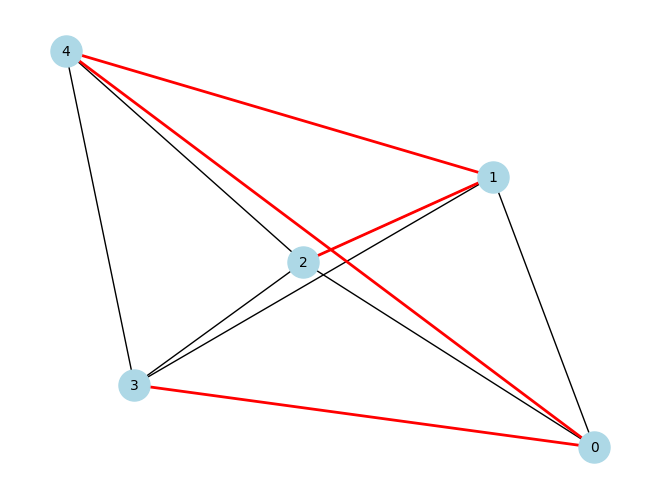

Particles: 20, Iterations: 150, C1: 1.0, C2: 1.0, Best Path: [1 4 0 3 2], Cost: 2


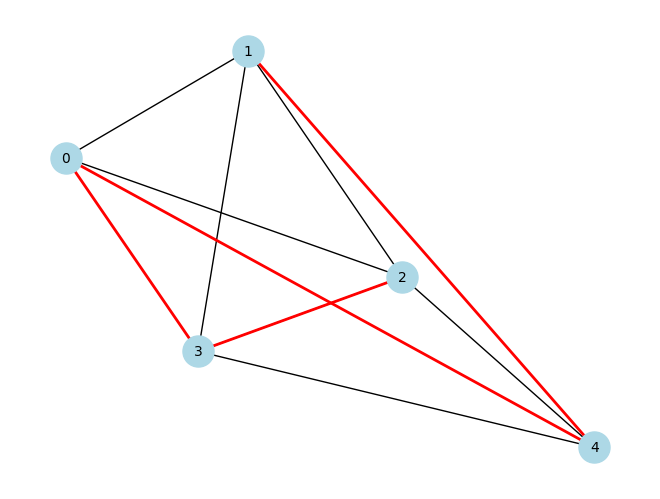

Particles: 20, Iterations: 150, C1: 1.0, C2: 1.5, Best Path: [2 1 4 0 3], Cost: 1


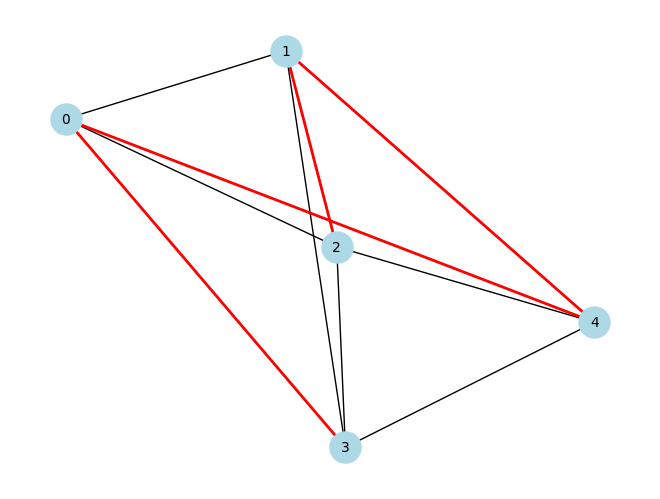

Particles: 20, Iterations: 150, C1: 1.0, C2: 2.0, Best Path: [2 1 4 3 0], Cost: 2


Particles: 20, Iterations: 150, C1: 1.5, C2: 1.0, Best Path: [2 1 4 0 3], Cost: 1


Particles: 20, Iterations: 150, C1: 1.5, C2: 1.5, Best Path: [2 3 0 4 1], Cost: 2


Particles: 20, Iterations: 150, C1: 1.5, C2: 2.0, Best Path: [3 0 4 1 2], Cost: 1


Particles: 20, Iterations: 150, C1: 2.0, C2: 1.0, Best Path: [3 0 4 1 2], Cost: 1


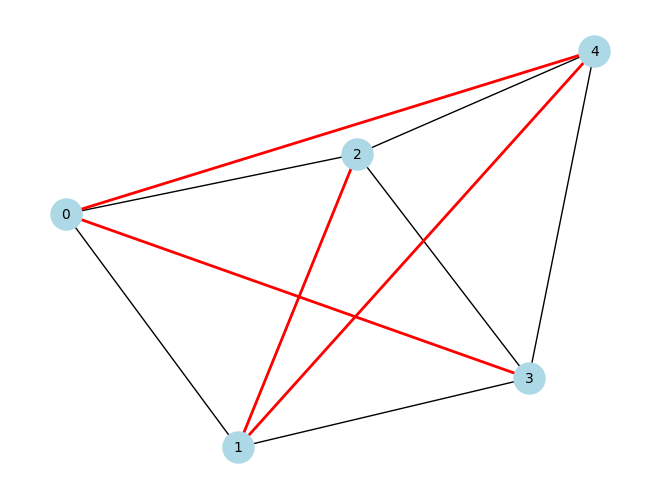

Particles: 20, Iterations: 150, C1: 2.0, C2: 1.5, Best Path: [2 1 4 0 3], Cost: 1


Particles: 20, Iterations: 150, C1: 2.0, C2: 2.0, Best Path: [2 3 0 4 1], Cost: 2


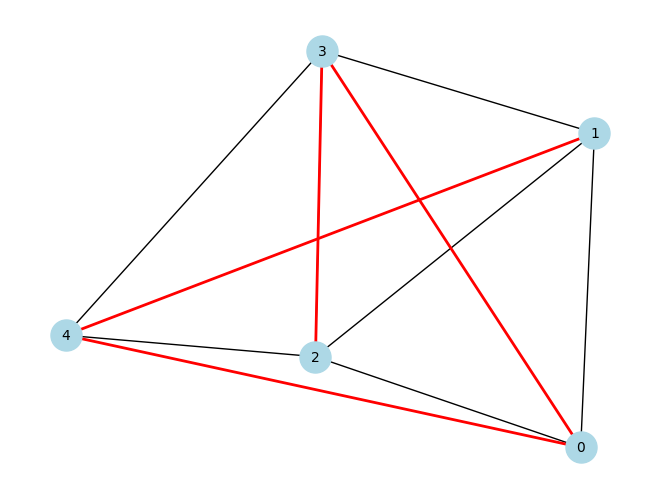

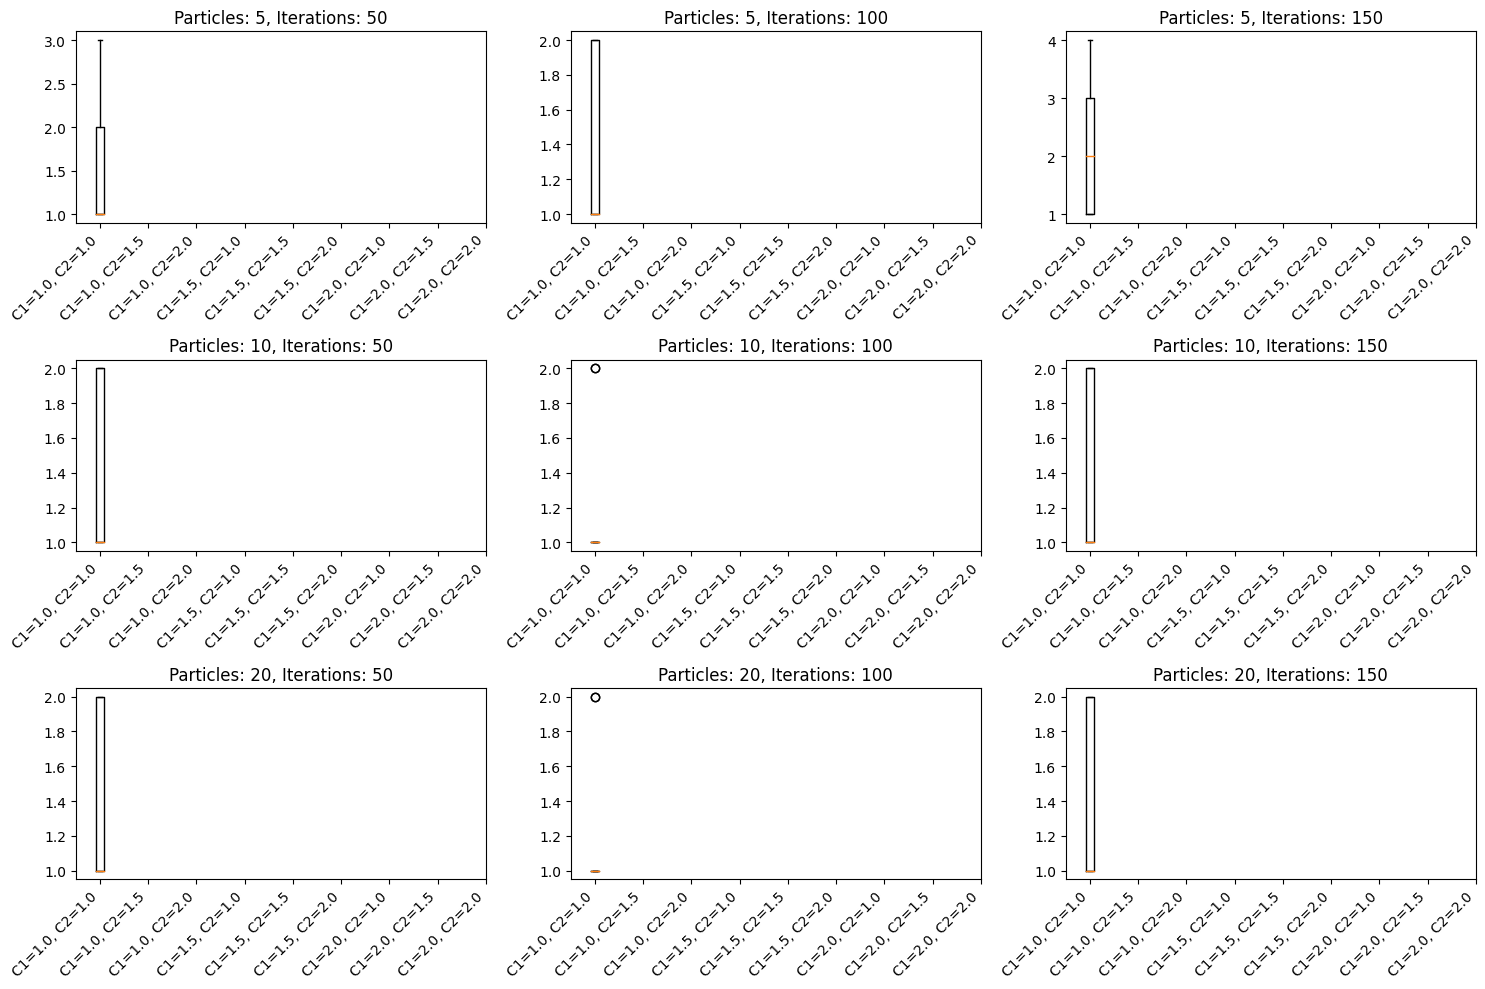

In [52]:

graph = [
    [0, 2, 4, 0, 0],
    [2, 0, 1, 3, 0],
    [4, 1, 0, 2, 5],
    [0, 3, 2, 0, 1],
    [0, 0, 5, 1, 0]
]

num_particles_values = [5, 10, 20]
max_iterations_values = [50, 100, 150]
c1_values = [1.0, 1.5, 2.0]
c2_values = [1.0, 1.5, 2.0]

results = {}

for num_particles in num_particles_values:
    for max_iterations in max_iterations_values:
        for c1 in c1_values:
            for c2 in c2_values:
                key = (num_particles, max_iterations, c1, c2)
                best_path, best_cost = run_simulation(graph, num_particles, max_iterations, c1, c2)
                results[key] = (best_path, best_cost)

                print(f"Particles: {num_particles}, Iterations: {max_iterations}, C1: {c1}, C2: {c2}, Best Path: {best_path}, Cost: {best_cost}")


                plot_graph_with_path(graph, best_path)


fig, axes = plt.subplots(len(num_particles_values), len(max_iterations_values), figsize=(15, 10))

for i, num_particles in enumerate(num_particles_values):
    for j, max_iterations in enumerate(max_iterations_values):
        costs = [results[(num_particles, max_iterations, c1, c2)][1] for c1 in c1_values for c2 in c2_values]
        tick_labels = [f'C1={c1}, C2={c2}' for c1 in c1_values for c2 in c2_values]
        axes[i, j].boxplot(costs)
        axes[i, j].set_title(f'Particles: {num_particles}, Iterations: {max_iterations}')
        axes[i, j].set_xticks(range(1, len(tick_labels) + 1))
        axes[i, j].set_xticklabels(tick_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()
